In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import csv
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from keras import models, layers, optimizers, regularizers
from sklearn.model_selection import train_test_split
from keras import regularizers
%matplotlib inline

In [2]:
raw_df = pd.read_csv('https://grantmlong.com/data/SE_rents2018_train.csv', index_col=0)
raw_test_df = pd.read_csv('https://grantmlong.com/data/SE_rents2018_test1.csv', index_col=0)
raw_test2_df = pd.read_csv('https://grantmlong.com/data/SE_rents2018_test2.csv', index_col=0)
raw_df = raw_df.append(raw_test_df)
raw_df.head(20)
raw_df.columns

Index(['addr_unit', 'building_id', 'bedrooms', 'bathrooms', 'size_sqft',
       'created_at', 'addr_street', 'addr_city', 'addr_zip', 'addr_lat',
       'addr_lon', 'bin', 'bbl', 'floor_count', 'year_built', 'min_to_subway',
       'has_doorman', 'has_elevator', 'has_fireplace', 'has_dishwasher',
       'is_furnished', 'has_gym', 'allows_pets', 'has_washer_dryer',
       'has_garage', 'has_roofdeck', 'has_concierge', 'has_pool', 'has_garden',
       'has_childrens_playroom', 'rent', 'no_fee', 'description',
       'neighborhood', 'borough', 'unit', 'floornumber', 'line'],
      dtype='object')

## Data Explore

In [3]:
raw_df.describe()

,building_id,bedrooms,bathrooms,size_sqft,addr_zip,addr_lat,addr_lon,bin,bbl,floor_count,...,has_washer_dryer,has_garage,has_roofdeck,has_concierge,has_pool,has_garden,has_childrens_playroom,rent,no_fee,floornumber
count,1.400000e+04,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,1.399900e+04,1.400000e+04,14000.000000,...,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,12498.000000
mean,1.542772e+06,1.661643,1.238929,848.388643,10681.801286,40.727746,-73.956776,2.368400e+06,2.285087e+09,10.233350,...,0.268500,0.170714,0.262643,0.208214,0.072357,0.133786,0.089571,3591.997214,0.495786,6.198232
std,4.323673e+06,1.084151,0.550979,513.039489,592.728072,0.053635,0.042994,1.242507e+06,1.200828e+09,12.003629,...,0.443195,0.376273,0.440086,0.406045,0.259088,0.340434,0.285577,2874.099247,0.500000,7.728606
min,7.300000e+01,0.000000,0.000000,0.000000,10001.000000,40.573898,-74.168405,1.000000e+06,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1250.000000,0.000000,0.000000
25%,6.231400e+04,1.000000,1.000000,604.000000,10023.000000,40.693256,-73.986095,1.052178e+06,1.011286e+09,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2250.000000,0.000000,2.000000
50%,2.545810e+05,2.000000,1.000000,800.000000,11103.000000,40.729048,-73.961554,3.018885e+06,3.006580e+09,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2900.000000,0.000000,3.000000
75%,8.267980e+05,2.000000,1.000000,1000.000000,11218.000000,40.764801,-73.936080,3.325600e+06,3.050558e+09,12.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3900.000000,1.000000,6.000000
max,1.877211e+07,8.000000,20.000000,10000.000000,11694.000000,40.909842,-73.730550,5.158986e+06,5.029930e+09,90.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,50000.000000,1.000000,78.000000


In [4]:
raw_df.shape

(14000, 38)

In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14000 entries, 7236931 to 7463404
Data columns (total 38 columns):
addr_unit                 13890 non-null object
building_id               14000 non-null int64
bedrooms                  14000 non-null int64
bathrooms                 14000 non-null float64
size_sqft                 14000 non-null float64
created_at                14000 non-null object
addr_street               14000 non-null object
addr_city                 14000 non-null object
addr_zip                  14000 non-null int64
addr_lat                  14000 non-null float64
addr_lon                  14000 non-null float64
bin                       13999 non-null float64
bbl                       14000 non-null int64
floor_count               14000 non-null float64
year_built                13530 non-null float64
min_to_subway             13857 non-null float64
has_doorman               14000 non-null int64
has_elevator              14000 non-null int64
has_fireplace    

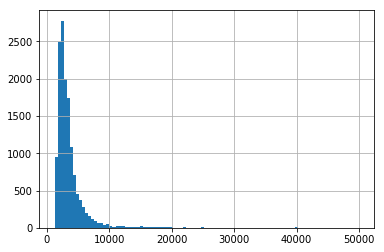

In [6]:
raw_df['rent'].hist(bins=100)

### Seperate all features into continuous, categorical and binary features.

For those none relatived features as below, we have excluded them from the features grouping: 
- addr_unit: no relationship
- building_id: no relationship
- addr_lat: hard to analyze latitude
- addr_lon: hard to analyze longtitude
- bin: no relationship
- bbl: no relationshio
- description: hard to build a NLP model
- unit: no relationship


In [3]:
continuous_features =['bathrooms','bedrooms','size_sqft','floor_count','year_built','min_to_subway','floornumber' ]
caterigal_features =['addr_street','addr_city','addr_zip','neighborhood','borough','line' ]
binary_features = ['has_doorman', 'has_elevator', 'has_fireplace', 'has_dishwasher','is_furnished', 'has_gym', 'allows_pets', 
                   'has_washer_dryer','has_garage', 'has_roofdeck', 'has_concierge', 'has_pool', 'has_garden',
                   'has_childrens_playroom', 'no_fee', ]

## Import external dataset from Internal Revenue Service
 - We will import the 2017 individual income Tax statistic dataset from IRS website(https://www.irs.gov/pub/irs-soi/17zpallagi.csv).
 - We will expend a new feature: **average_income** based on zipcode to our raw dataset 

In [3]:
raw_income_data=pd.read_csv('https://www.irs.gov/pub/irs-soi/17zpallagi.csv', index_col=0)
raw_income_data.columns

Index(['STATE', 'zipcode', 'agi_stub', 'N1', 'mars1', 'MARS2', 'MARS4', 'ELF',
       'CPREP', 'PREP',
       ...
       'N85300', 'A85300', 'N11901', 'A11901', 'N11900', 'A11900', 'N11902',
       'A11902', 'N12000', 'A12000'],
      dtype='object', length=152)

In [9]:
raw_income_data.describe()

,zipcode,agi_stub,N1,mars1,MARS2,MARS4,ELF,CPREP,PREP,DIR_DEP,...,N85300,A85300,N11901,A11901,N11900,A11900,N11902,A11902,N12000,A12000
count,166537.000000,166537.000000,1.665370e+05,1.665370e+05,1.665370e+05,166537.000000,1.665370e+05,166537.000000,1.665370e+05,1.665370e+05,...,166537.000000,1.665370e+05,166537.000000,1.665370e+05,1.665370e+05,1.665370e+05,1.665370e+05,1.665370e+05,166537.000000,1.665370e+05
mean,48870.221668,3.499883,1.797506e+03,8.568076e+02,6.466075e+02,257.395354,1.595375e+03,109.165711,9.565737e+02,1.115313e+03,...,52.247849,2.652260e+02,366.565508,2.075837e+03,1.385102e+03,4.864975e+03,1.349381e+03,3.932834e+03,43.103875,8.790301e+02
std,27140.457939,1.707903,3.682065e+04,2.157115e+04,1.180901e+04,6579.521856,3.234179e+04,2546.536828,1.996698e+04,2.347348e+04,...,2663.659358,1.535593e+04,6891.242958,6.608186e+04,2.947749e+04,1.012458e+05,2.909491e+04,7.693938e+04,947.324343,4.399491e+04
min,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,27030.000000,2.000000,7.000000e+01,0.000000e+00,4.000000e+01,0.000000,6.000000e+01,0.000000,4.000000e+01,4.000000e+01,...,0.000000,0.000000e+00,20.000000,2.100000e+01,5.000000e+01,1.580000e+02,4.000000e+01,1.410000e+02,0.000000,0.000000e+00
50%,48876.000000,3.000000,2.500000e+02,7.000000e+01,1.100000e+02,20.000000,2.200000e+02,0.000000,1.500000e+02,1.400000e+02,...,0.000000,0.000000e+00,60.000000,1.550000e+02,1.800000e+02,6.220000e+02,1.700000e+02,5.480000e+02,0.000000,0.000000e+00
75%,70601.000000,5.000000,1.020000e+03,3.400000e+02,3.800000e+02,90.000000,9.100000e+02,60.000000,5.600000e+02,5.900000e+02,...,0.000000,0.000000e+00,220.000000,6.870000e+02,7.400000e+02,2.484000e+03,7.100000e+02,2.207000e+03,30.000000,6.400000e+01
max,99999.000000,6.000000,5.824360e+06,4.130490e+06,1.757700e+06,982390.000000,4.980210e+06,475240.000000,3.387570e+06,3.233490e+06,...,763140.000000,4.031847e+06,890950.000000,1.750126e+07,4.598480e+06,1.667374e+07,4.561540e+06,9.443931e+06,186110.000000,1.056186e+07


### Income Dataset Description 
This dataset comes from the IRS website's 2017 ZIP Code Data (SOI) about Individual Income Tax Statistics.
According to the documentation's overview,the Statistics of Income (SOI) Division’s ZIP code data is tabulated using individual income tax returns (Forms 1040) filed with the Internal Revenue Service (IRS) during the 12-month period, January 1, 2018 to December 31, 2018.
The original dataset contains many income and Tax Items, we only keep the ones that are relevant: 
- STATEFIPS:The State Federal Information Processing System (FIPS) code
- STATE: The State associated with the ZIP code
- ZIPCODE: 5-digit Zip code
- agi_stub: Size of adjusted gross income
- N1: Total number of returns
- A02650: Number of returns with total income

Our goal is to find the average income of each zipcode.

### Clean the raw income data and rename feature

In [4]:
raw_income_data = raw_income_data.loc[raw_income_data['STATE']=='NY']
raw_income_data.rename(columns = {'N1':'total_returns', 'A02650':'total_income'}, inplace = True) 
raw_income_data = raw_income_data[['STATE','zipcode','agi_stub','total_returns', 'total_income']]
raw_income_data = raw_income_data.loc[raw_income_data['zipcode']<99999]
raw_income_data = raw_income_data.loc[raw_income_data['zipcode']>0]


### Function to calculate the average income by zip code
Each zip code has 6 different sizes of adjusted gross income which means we have 6 different number of total returns and total income for one zip code.
By using the np.where and sum function, we can obtain the sum of income and sum of returns for each zip code. The income of the original dataset was in thousands of dollar so we need to multiply the sum of income by 1000 and then find the average. Since some zip code was not in the original set, we ingore those average that is NaN and only write the meaningful averages to csv file for future use.

- Calculate average income 
- Export to ny_income_2017.csv for storage
- For next time, no need to import the raw_income_dataset again

In [5]:
average_income = pd.DataFrame({'addr_zip':[],'zip_average_income':[]})

def calculate_avg_income():
    global average_income
    for zipcode in range(10001, 14906):
        current_sum=np.where(raw_income_data['zipcode']==zipcode, raw_income_data['total_income'],0).sum()
        current_returns=np.where(raw_income_data['zipcode']==zipcode, raw_income_data['total_returns'],0).sum() 
        if(current_returns <=0 or current_sum<=0):
            continue
        avg_income=(current_sum*1000)/current_returns
        new_row={'addr_zip':zipcode,'zip_average_income':avg_income}
        average_income=average_income.append(new_row,ignore_index=True)           
calculate_avg_income()
average_income.head(5)

,addr_zip,zip_average_income
0,10001.0,183859.908735
1,10002.0,59669.401750
2,10003.0,306277.962003
3,10004.0,385265.306122
4,10005.0,391201.520270


 - We realize that the income dataset is missing all income data between zipcode 11239 - 11354, we will take an averge of zipcode income for 11239 and 11354 to replace any zipcode income in between 
 - In our training and testing dataset, only the zipcode income 11249 is missing

In [12]:
print(list(set(raw_df['addr_zip']) - set(average_income['addr_zip'])))
print(list(set(raw_test_df['addr_zip']) - set(average_income['addr_zip'])))

[11249]
[11249]


**Insert a new row for zipcode income 11249 into the average_income dataframe**

In [6]:
avg_income = (average_income.loc[(average_income['addr_zip']==11239)].iloc[0]['zip_average_income'] +
             average_income.loc[(average_income['addr_zip']==11354)].iloc[0]['zip_average_income'])/2
new_row = {'addr_zip':11249,'zip_average_income':avg_income}
average_income=average_income.append(new_row,ignore_index=True)  

### Merge the raw train  dataset with the income dataset by addr_zip

In [7]:
raw_test2_df=raw_test_df.reset_index().merge(average_income, how="left",on='addr_zip').set_index('rental_id')
raw_df=raw_df.reset_index().merge(average_income, how="left",on='addr_zip').set_index('rental_id')

### Find zip_average_income and rent cooleration

In [9]:
continuous_features.append('zip_average_income')

In [16]:
continuous_df = raw_df[['zip_average_income','rent']]
continuous_df.corr()['rent'][:-1]


zip_average_income    0.393228
Name: rent, dtype: float64

**The correlation between zip_average_income and rent is 0.403558, it is good enough to consider as a important feature that might impact the rent**

# Data Cleaning


### Handling missing data
In order to handle missing data in this dataset, we frist find and count all the null values.

In [17]:
raw_df.isna().sum()

addr_unit                  110
building_id                  0
bedrooms                     0
bathrooms                    0
size_sqft                    0
created_at                   0
addr_street                  0
addr_city                    0
addr_zip                     0
addr_lat                     0
addr_lon                     0
bin                          1
bbl                          0
floor_count                  0
year_built                 470
min_to_subway              143
has_doorman                  0
has_elevator                 0
has_fireplace                0
has_dishwasher               0
is_furnished                 0
has_gym                      0
allows_pets                  0
has_washer_dryer             0
has_garage                   0
has_roofdeck                 0
has_concierge                0
has_pool                     0
has_garden                   0
has_childrens_playroom       0
rent                         0
no_fee                       0
descript

As we can see from the result,there are missing data appearing on: 
- addr_unit
- bin 
- year_built 
- min_to_subway 
- description 
- neighborhood 
- unit 
- floornumber 
- line 

Base on our data exploration, we can see that in this case, all features beside year_built,min_to_subway,neighborhood,and floornumber has not much impact to our final result, thus we don't need to worry about them.

Then, we will be dropping the rows which we don't have values for year_built, min_to_subway, neighborhood, and floornumber.

In [8]:
# We will call the new df md_df
# md_df = raw_df.loc[
#     raw_df.year_built.notnull() &
#     raw_df.min_to_subway.notnull() & 
#     raw_df.neighborhood.notnull() & 
#     raw_df.floornumber.notnull()
# ]

# Reminder:
# use mode to replace NAN value, compare both method when creating models
md_df = raw_df.loc[
    raw_df.year_built.notnull() &
    raw_df.min_to_subway.notnull() & 
    raw_df.neighborhood.notnull() 
]

md_df['floornumber'].fillna(md_df['floornumber'].mode()[0], inplace=True)
raw_test2_df['floornumber'].fillna(raw_test2_df['floornumber'].mode()[0], inplace=True)



print("original shape of dataset:",raw_df.shape)
print("shape of dataset after handling missing data:",md_df.shape)

original shape of dataset: (14000, 39)
shape of dataset after handling missing data: (13394, 39)


/home/nbuser/anaconda3_420/lib/python3.5/site-packages/pandas/core/generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


## Remove outliers

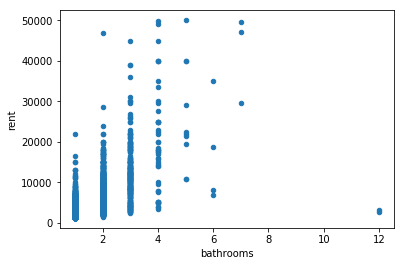

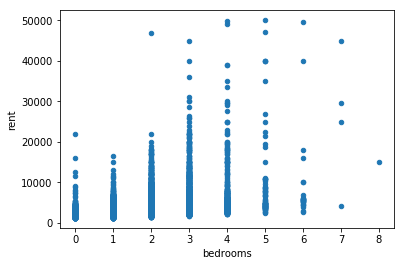

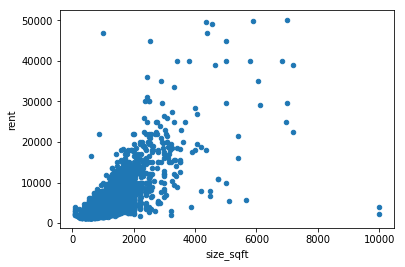

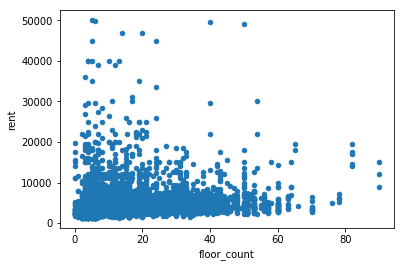

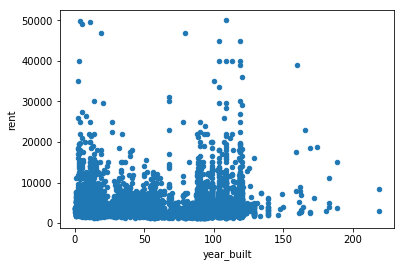

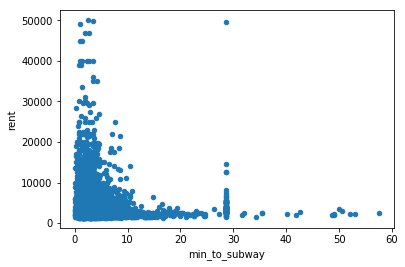

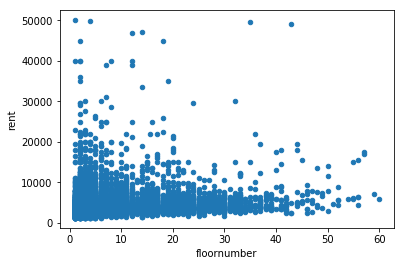

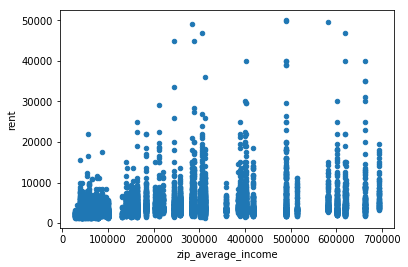

In [53]:
for feature in continuous_features:
    md_df.plot.scatter(feature, 'rent')

In [61]:
md_df[md_df['rent']>40000].count()

addr_unit                 8
building_id               8
bedrooms                  8
bathrooms                 8
size_sqft                 8
created_at                8
addr_street               8
addr_city                 8
addr_zip                  8
addr_lat                  8
addr_lon                  8
bin                       8
bbl                       8
floor_count               8
year_built                8
min_to_subway             8
has_doorman               8
has_elevator              8
has_fireplace             8
has_dishwasher            8
is_furnished              8
has_gym                   8
allows_pets               8
has_washer_dryer          8
has_garage                8
has_roofdeck              8
has_concierge             8
has_pool                  8
has_garden                8
has_childrens_playroom    8
rent                      8
no_fee                    8
description               8
neighborhood              8
borough                   8
unit                

**drop size_sqrt = 0 for now, since there are 713 rows, might replace with mode when creating models**

In [11]:
def remove_outliers(md_df, feature, low_value, high_value):
    print(feature, ': ', md_df.shape)
    md_df = md_df[md_df[feature]>low_value]
    md_df = md_df[md_df[feature]<=high_value]
    md_df.reset_index(drop=True,inplace=True)
    print(feature, ': ', md_df.shape)
    return md_df

md_df = remove_outliers(md_df, 'rent', 0, 40000)
md_df = remove_outliers(md_df, 'bathrooms', 0, 12)
md_df = remove_outliers(md_df, 'size_sqft', 0, 10000)
md_df = remove_outliers(md_df, 'year_built', 1700, 2019)
md_df = remove_outliers(md_df, 'min_to_subway', 0, 60)
md_df = remove_outliers(md_df, 'floornumber', 0, 60)

md_df['year_built'] = 2019 - md_df['year_built'].astype(int)

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### Encode categorical feature and drop useless features

In [14]:
boroughs = np.array(md_df['borough'].unique())

for borough in boroughs:
    md_df[borough] = md_df['borough'].apply(lambda x : int(x == borough))
    raw_test2_df[borough] = raw_test2_df['borough'].apply(lambda x : int(x == borough))

features_notNeed = ['addr_unit', 'building_id', 'created_at', 'addr_street', 'addr_city', 'addr_zip', 'bin', 'bbl', 'description', \
                    'neighborhood', 'unit', 'borough', 'line']

md_df = md_df.drop(features_notNeed, axis=1)

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### Use pair coorelation for continuous features

In [23]:
continuous_df = md_df[continuous_features+['rent']]
continuous_df.corr()['rent'][:-1]

bathrooms             0.640607
bedrooms              0.346474
size_sqft             0.703703
floor_count           0.251880
year_built           -0.104735
min_to_subway        -0.066488
floornumber           0.246590
zip_average_income    0.404019
Name: rent, dtype: float64

### Check coorelation for binary features

In [64]:
md_df[binary_features+['rent']].corr()['rent'][:-1]
coor_results= []

for feature in binary_features:
  df = raw_df.groupby([feature]).aggregate(['mean'])['rent']
  df[feature]= df.index
  coor_results.append(df.corr().iloc[0][1])
coor_df = pd.DataFrame({'Coorelation': coor_results,'Feature':binary_features})
coor_df


/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Coorelation,Feature
0,1.0,has_doorman
1,1.0,has_elevator
2,1.0,has_fireplace
3,1.0,has_dishwasher
4,1.0,is_furnished
5,1.0,has_gym
6,1.0,allows_pets
7,1.0,has_washer_dryer
8,1.0,has_garage
9,1.0,has_roofdeck


As we can see in the correlation table, all binrary features highly affected the rents. When we build the models, we should include all binary features.

## Build Models

In [86]:
md_df = shuffle(md_df).reset_index(drop=True)


In [92]:
features = list(md_df.columns)
features.remove('rent')
k_fold = KFold(n_splits=10)

In [88]:
def get_cv_results(regressor):
    
    results = []
    for train, test in k_fold.split(md_df):
        regressor.fit(md_df.loc[train, features], md_df.loc[train, 'rent'])
        y_predicted = regressor.predict(md_df.loc[test, features])
        accuracy = mean_squared_error(md_df.loc[test, 'rent'], y_predicted)**0.5
        results.append(accuracy)

    return np.mean(results), np.std(results)

### Radnom Forest Model

In [90]:
rforest = RandomForestRegressor(
    random_state=11, 
    max_depth=10,
    n_estimators=200
)

In [34]:
for feature,score in sorted(zip(features,rforest.feature_importances_), key=lambda x:x[1], reverse=True):
    print(feature, ' ', score)

size_sqft   0.6026735867413207
zip_average_income   0.19291566116303793
bathrooms   0.14306091992678185
addr_lon   0.010777625160274284
addr_lat   0.009073070305788666
year_built   0.0072792283283057806
floor_count   0.006934650944057395
bedrooms   0.005313195551636179
floornumber   0.004655005247978293
has_roofdeck   0.0037950470994773332
has_gym   0.003355195566386722
has_elevator   0.0017536909435835952
min_to_subway   0.0015467225880046987
has_fireplace   0.0011229946417606516
has_washer_dryer   0.0010133000141462833
has_doorman   0.0008959408832365032
no_fee   0.0008806359170838471
is_furnished   0.0007337760821032542
has_dishwasher   0.0005163383370224299
has_childrens_playroom   0.00041537449889042857
has_concierge   0.0003692173576086213
Manhattan   0.0002734626692997353
has_pool   0.00023576710334690133
has_garden   0.00018654020627915265
allows_pets   0.0001546148623916819
has_garage   3.898997453872368e-05
Brooklyn   2.8350627987975228e-05
Bronx   1.0972576705872679e-06
Quee

In [93]:
get_cv_results(rforest)

(1128.030208102354, 174.90346982697022)

### Multiple Regression

In [31]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [32]:
mul_reg_features = features[:]
x = md_df[features] 
y = md_df['rent']
est = sm.OLS(y, x).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rent   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     993.2
Date:                Sat, 16 Nov 2019   Prob (F-statistic):               0.00
Time:                        22:33:55   Log-Likelihood:            -1.0848e+05
No. Observations:               12321   AIC:                         2.170e+05
Df Residuals:                   12291   BIC:                         2.172e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
bedrooms                 -31.8203     19.557     -1.627      0.104     -70.155       6.515
bathrooms               1166.9585     38.587     30.242      0.000    1091.322    1242.595
size_sqft                  3.4330      0.048     71.174      0.000       3.338       3.528
addr_lat                2442.8855    480.360      5.086      0.000    1501.304    3384.467
addr_lon               -6488.7139    567.976    -11.424      0.000   -7602.037   -5375.391
floor_count              -17.2193      2.644     -6.513      0.000     -22.402     -12.037
year_built                -0.2128      0.514     -0.414      0.679      -1.221       0.795
min_to_subway            -17.2266      4.137     -4.164      0.000     -25.337      -9.117
has_doorman              138.8569     55.169      2.517      0.012      30.717     246.997
has_elevator             273.0282     45.092      6.055      0.000     184.641     361.416
has_fireplace            302.1482     78.546      3.847      0.000     148.187     456.110
has_dishwasher          -194.3950     33.819     -5.748      0.000    -260.685    -128.105
is_furnished             656.4748     83.933      7.821      0.000     491.952     820.998
has_gym                  352.9447     55.653      6.342      0.000     243.855     462.034
allows_pets              155.7530     32.612      4.776      0.000      91.828     219.678
has_washer_dryer         245.7751     37.746      6.511      0.000     171.788     319.763
has_garage              -122.8829     46.847     -2.623      0.009    -214.711     -31.055
has_roofdeck             164.6561     41.529      3.965      0.000      83.252     246.060
has_concierge            184.7418     56.363      3.278      0.001      74.262     295.222
has_pool                 173.2986     66.935      2.589      0.010      42.096     304.501
has_garden               -33.1303     45.921     -0.721      0.471    -123.143      56.882
has_childrens_playroom    78.0879     62.141      1.257      0.209     -43.718     199.893
no_fee                  -117.7690     33.332     -3.533      0.000    -183.104     -52.434
floornumber               29.8841      3.301      9.052      0.000      23.413      36.355
zip_average_income         0.0027      0.000     20.076      0.000       0.002       0.003
Brooklyn               -5.813e+05   5.21e+04    -11.151      0.000   -6.83e+05   -4.79e+05
Manhattan              -5.808e+05   5.22e+04    -11.135      0.000   -6.83e+05   -4.79e+05
Queens                 -5.812e+05   5.21e+04    -11.152      0.000   -6.83e+05   -4.79e+05
Bronx                   -5.82e+05   5.22e+04    -11.159      0.000   -6.84e+05    -4.8e+05
Staten Island          -5.837e+05   5.22e+04    -11.185      0.000   -6.86e+05   -4.81e+05
==============================================================================
O

In [33]:
mul_reg_features.remove('has_garden')
mul_reg_features.remove('year_built')
mul_reg_features.remove('bedrooms')

In [37]:
mul_reg = LinearRegression().fit(md_df[mul_reg_features], md_df['rent'])
get_cv_results(mul_reg)

(1604.3419171313562, 238.24968621576002)

### Neural Network

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(md_df[features])
Y = md_df['rent'].reshape(-1,1)

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=42)

In [79]:
net = models.Sequential()
net.add(layers.Dense(64, input_dim=train_x.shape[1], kernel_regularizer=regularizers.l1(0.1), activation='relu'))
net.add(layers.Dropout(0.1))

net.add(layers.Dense(64, kernel_regularizer=regularizers.l1(0.1), activation='relu'))
net.add(layers.Dropout(0.1))

net.add(layers.Dense(128, kernel_regularizer=regularizers.l1(0.1), activation='relu'))
net.add(layers.Dropout(0.1))

net.add(layers.Dense(256, kernel_regularizer=regularizers.l1(0.1), activation='relu'))
net.add(layers.Dropout(0.1))

net.add(layers.Dense(1, activation='linear'))

net.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['mean_squared_error'])

In [80]:
net.fit(train_x, train_y, epochs=150, batch_size=64, validation_split = 0.1)

Train on 9643 samples, validate on 1072 samples
Epoch 1/150
9643/9643 [==============================] - 2s - loss: 10205766.7038 - mean_squared_error: 10205375.2345 - val_loss: 3562951.3946 - val_mean_squared_error: 3562535.6688
Epoch 2/150
9643/9643 [==============================] - 1s - loss: 2839195.3761 - mean_squared_error: 2838787.1164 - val_loss: 3025121.5373 - val_mean_squared_error: 3024720.2826
Epoch 3/150
9643/9643 [==============================] - 2s - loss: 2551122.2705 - mean_squared_error: 2550723.9596 - val_loss: 3197622.4543 - val_mean_squared_error: 3197233.8050
Epoch 4/150
9643/9643 [==============================] - 2s - loss: 2365849.2444 - mean_squared_error: 2365459.1518 - val_loss: 2833072.3881 - val_mean_squared_error: 2832680.9272
Epoch 5/150
9643/9643 [==============================] - 2s - loss: 2210471.3234 - mean_squared_error: 2210085.7182 - val_loss: 2724248.8489 - val_mean_squared_error: 2723864.4011
Epoch 6/150
9643/9643 [===========================

9643/9643 [==============================] - 1s - loss: 1245731.6273 - mean_squared_error: 1245272.1974 - val_loss: 2310336.2547 - val_mean_squared_error: 2309874.9991
Epoch 47/150
9643/9643 [==============================] - 1s - loss: 1318008.3815 - mean_squared_error: 1317546.1526 - val_loss: 2329231.6595 - val_mean_squared_error: 2328769.7164
Epoch 48/150
9643/9643 [==============================] - 1s - loss: 1284794.1060 - mean_squared_error: 1284329.3452 - val_loss: 2380465.5168 - val_mean_squared_error: 2379997.3190
Epoch 49/150
9643/9643 [==============================] - 1s - loss: 1206984.3280 - mean_squared_error: 1206515.9331 - val_loss: 2345969.7640 - val_mean_squared_error: 2345501.2565
Epoch 50/150
9643/9643 [==============================] - 2s - loss: 1202003.2481 - mean_squared_error: 1201534.8401 - val_loss: 2347615.4095 - val_mean_squared_error: 2347142.3862
Epoch 51/150
9643/9643 [==============================] - 1s - loss: 1196914.1803 - mean_squared_error: 1196

9643/9643 [==============================] - 1s - loss: 893516.1074 - mean_squared_error: 892976.6872 - val_loss: 2342078.3727 - val_mean_squared_error: 2341538.9081
Epoch 92/150
9643/9643 [==============================] - 1s - loss: 935798.6331 - mean_squared_error: 935257.1701 - val_loss: 2321615.6166 - val_mean_squared_error: 2321069.3181
Epoch 93/150
9643/9643 [==============================] - 1s - loss: 936148.9349 - mean_squared_error: 935601.5944 - val_loss: 2358003.7929 - val_mean_squared_error: 2357460.3671
Epoch 94/150
9643/9643 [==============================] - 1s - loss: 990039.5975 - mean_squared_error: 989492.6182 - val_loss: 2338320.1437 - val_mean_squared_error: 2337769.1343
Epoch 95/150
9643/9643 [==============================] - 2s - loss: 1047892.9055 - mean_squared_error: 1047347.4148 - val_loss: 2273995.6604 - val_mean_squared_error: 2273447.8041
Epoch 96/150
9643/9643 [==============================] - 1s - loss: 823698.5874 - mean_squared_error: 823149.2075 -

9643/9643 [==============================] - 2s - loss: 860958.5776 - mean_squared_error: 860381.8663 - val_loss: 2259029.0406 - val_mean_squared_error: 2258451.2528
Epoch 137/150
9643/9643 [==============================] - 2s - loss: 842198.3712 - mean_squared_error: 841620.4958 - val_loss: 2308798.7901 - val_mean_squared_error: 2308219.3806
Epoch 138/150
9643/9643 [==============================] - 2s - loss: 807912.8269 - mean_squared_error: 807332.1980 - val_loss: 2291739.9697 - val_mean_squared_error: 2291161.1635
Epoch 139/150
9643/9643 [==============================] - 2s - loss: 865050.8532 - mean_squared_error: 864469.6733 - val_loss: 2291902.2449 - val_mean_squared_error: 2291321.6236
Epoch 140/150
9643/9643 [==============================] - 2s - loss: 868385.0784 - mean_squared_error: 867803.3317 - val_loss: 2315041.3410 - val_mean_squared_error: 2314458.6908
Epoch 141/150
9643/9643 [==============================] - 1s - loss: 814469.9796 - mean_squared_error: 813886.591

In [81]:
mean_squared_error(test_y, net.predict(test_x))

853411.6171418771